In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
crime_per_state_path = "Data/Crime_data_per_state.csv"

In [3]:
crime_stats = pd.read_csv(crime_per_state_path)
crime_stats

,Area Name,Year,Variable,Value
0,Colorado,2015,Violent Crimes Per 100,321
1,Delaware,1990,Violent Crimes Per 100,655
2,California,1994,Violent Crimes Per 100,1013
3,Delaware,2014,Property Crimes Per 100,2982
4,Utah,2014,Property Crimes Per 100,2879
...,...,...,...,...
4126,New York,1991,Crimes Per 100,6245
4127,District of Columbia,2005,Crimes Per 100,6206
4128,Connecticut,1998,Crimes Per 100,3787
4129,New Hampshire,2009,Crimes Per 100,2321


In [4]:
crime_stats_2016 = crime_stats[crime_stats['Year'] == 2016]
crime_stats_2016

,Area Name,Year,Variable,Value
6,New York,2016,Property Crimes Per 100,1546
42,Minnesota,2016,Crimes Per 100,2376
44,Nevada,2016,Property Crimes Per 100,2587
45,New Mexico,2016,Property Crimes Per 100,3937
64,West Virginia,2016,Crimes Per 100,2405
...,...,...,...,...
3980,California,2016,Violent Crimes Per 100,445
3982,Kansas,2016,Property Crimes Per 100,2696
4057,Missouri,2016,Violent Crimes Per 100,519
4094,Mississippi,2016,Crimes Per 100,3049


In [5]:
crime_stats_2016.rename(columns={'Area Name': 'State',
                   'Variable': 'Crime Type',
                    'Value': 'Total Crimes'},
          inplace=True)
crime_stats_2016

C:\Users\swire\AppData\Local\Temp\ipykernel_4772\3062401968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_stats_2016.rename(columns={'Area Name': 'State',


,State,Year,Crime Type,Total Crimes
6,New York,2016,Property Crimes Per 100,1546
42,Minnesota,2016,Crimes Per 100,2376
44,Nevada,2016,Property Crimes Per 100,2587
45,New Mexico,2016,Property Crimes Per 100,3937
64,West Virginia,2016,Crimes Per 100,2405
...,...,...,...,...
3980,California,2016,Violent Crimes Per 100,445
3982,Kansas,2016,Property Crimes Per 100,2696
4057,Missouri,2016,Violent Crimes Per 100,519
4094,Mississippi,2016,Crimes Per 100,3049


In [6]:
crime_stats_2016_a_z = crime_stats_2016.sort_values(by=['State', 'Crime Type'], ascending=[True, True])
crime_stats_2016_a_z

,State,Year,Crime Type,Total Crimes
569,Alabama,2016,Crimes Per 100,3480
768,Alabama,2016,Property Crimes Per 100,2948
728,Alabama,2016,Violent Crimes Per 100,532
2204,Alaska,2016,Crimes Per 100,4157
3707,Alaska,2016,Property Crimes Per 100,3353
...,...,...,...,...
472,Wisconsin,2016,Property Crimes Per 100,1933
2598,Wisconsin,2016,Violent Crimes Per 100,306
2106,Wyoming,2016,Crimes Per 100,2202
3212,Wyoming,2016,Property Crimes Per 100,1957


In [7]:
crime_stats_2016_cleaned = crime_stats_2016_a_z.drop(columns=['Year'])
crime_stats_2016_cleaned

,State,Crime Type,Total Crimes
569,Alabama,Crimes Per 100,3480
768,Alabama,Property Crimes Per 100,2948
728,Alabama,Violent Crimes Per 100,532
2204,Alaska,Crimes Per 100,4157
3707,Alaska,Property Crimes Per 100,3353
...,...,...,...
472,Wisconsin,Property Crimes Per 100,1933
2598,Wisconsin,Violent Crimes Per 100,306
2106,Wyoming,Crimes Per 100,2202
3212,Wyoming,Property Crimes Per 100,1957


In [8]:
crime_stats_2016_totals = crime_stats_2016_cleaned.groupby('State')['Total Crimes'].sum()
crime_stats_2016_totals

State
Alabama                  6960
Alaska                   8314
Arizona                  6897
Arkansas                 7640
California               5996
Colorado                 6167
Connecticut              4070
Delaware                 6550
District of Columbia    12018
Florida                  6234
Georgia                  6805
Hawaii                   6604
Idaho                    3949
Illinois                 4970
Indiana                  5988
Iowa                     4754
Kansas                   6152
Kentucky                 4844
Louisiana                7728
Maine                    3540
Maryland                 5514
Massachusetts            3876
Michigan                 4738
Minnesota                4752
Mississippi              6098
Missouri                 6637
Montana                  6104
Nebraska                 5108
Nevada                   6530
New Hampshire            3422
New Jersey               3580
New Mexico               9280
New York                 3844
Nort

In [10]:
crime_2016_totals_df = crime_stats_2016_totals.to_frame()
crime_2016_totals_df.reset_index(inplace=True)
crime_2016_totals_df.insert(0, "Ranking",'')
crime_2016_totals_df 

,Ranking,State,Total Crimes
0,,Alabama,6960
1,,Alaska,8314
2,,Arizona,6897
3,,Arkansas,7640
4,,California,5996
5,,Colorado,6167
6,,Connecticut,4070
7,,Delaware,6550
8,,District of Columbia,12018
9,,Florida,6234


In [11]:
crime_2016_final= crime_2016_totals_df.sort_values(by=['Total Crimes'], ascending=[False])
crime_2016_final

,Ranking,State,Total Crimes
8,,District of Columbia,12018
31,,New Mexico,9280
1,,Alaska,8314
18,,Louisiana,7728
3,,Arkansas,7640
47,,Washington,7592
40,,South Carolina,7492
42,,Tennessee,6974
0,,Alabama,6960
2,,Arizona,6897


In [12]:
crime_2016_final.to_csv('Data/Crime_stats_2016.csv', index=False)

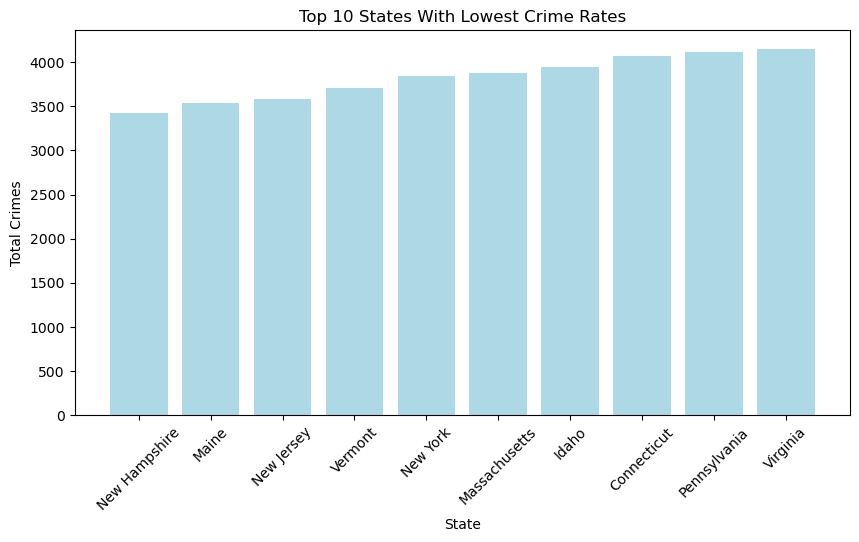

In [46]:
lowest_crime_10_states_graph = crime_2016_final.sort_values(by='Total Crimes', ascending=True).head(10)
plt.figure(figsize=(10, 5))
plt.bar(lowest_crime_10_states_graph['State'], lowest_crime_10_states_graph['Total Crimes'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Total Crimes')
plt.title('Top 10 States With Lowest Crime Rates')
plt.xticks(rotation=45)
plt.savefig('lowest_crime_10_states_graph.png', dpi=100, bbox_inches = "tight")
plt.show()

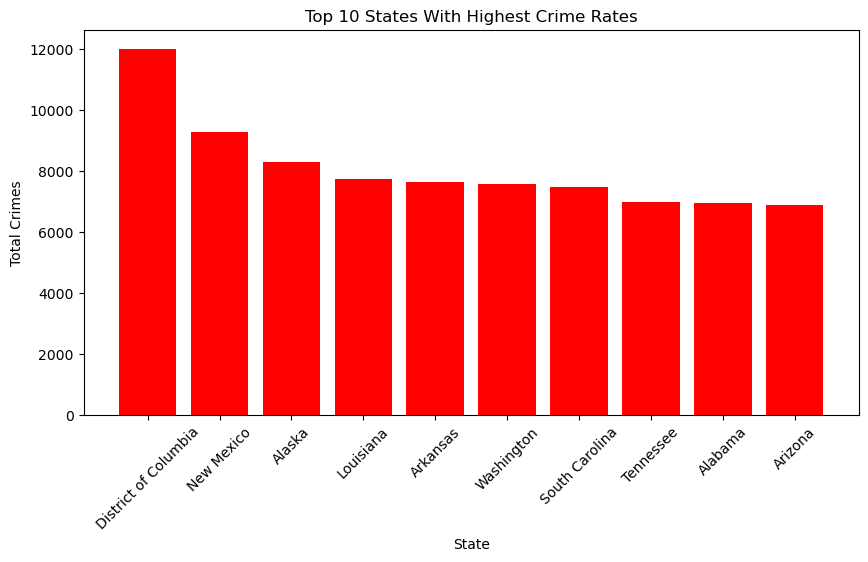

In [45]:
highest_crime_10_states_graph = crime_2016_final.sort_values(by='Total Crimes', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(highest_crime_10_states_graph['State'], highest_crime_10_states_graph['Total Crimes'], color='red')
plt.xlabel('State')
plt.ylabel('Total Crimes')
plt.title('Top 10 States With Highest Crime Rates')
plt.xticks(rotation=45)
plt.savefig('highest_crime_10_states_graph.png', dpi=100, bbox_inches = "tight")
plt.show()